<a href="https://colab.research.google.com/github/geethareddyv/Resume/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading Datasets and Importing Libraries

In [32]:
# Importing Tensorflow and the required visualization libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#Loading the Dataset
train = pd.read_csv('/content/drive/My Drive/Data_analytics/train.csv')
test = pd.read_csv('/content/drive/My Drive/Data_analytics/test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

# Visualizing Data

<Axes: ylabel='count'>

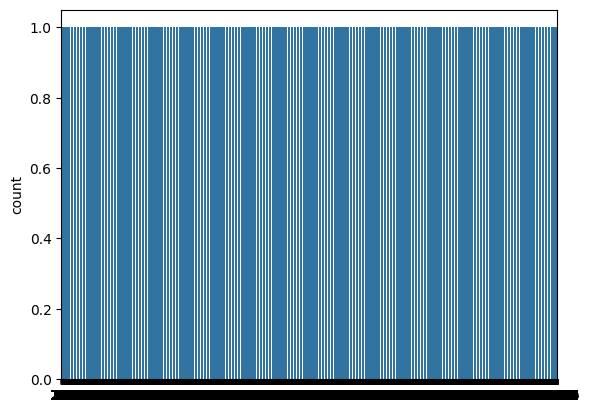

In [34]:
#Visualizing the Distribution of digits in labels
sns.countplot(y)

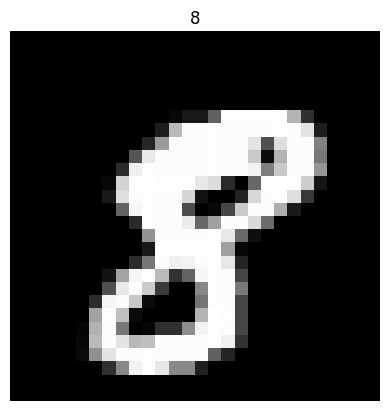

In [35]:
#Visualing an example
img = train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[10])
plt.axis("off")
plt.show()

# Preprocessing Data

In [36]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

# Building, Compiling and Training model

In [37]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            #tf.keras.layers.Dropout(0.2),
            #second layer
            tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            #tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


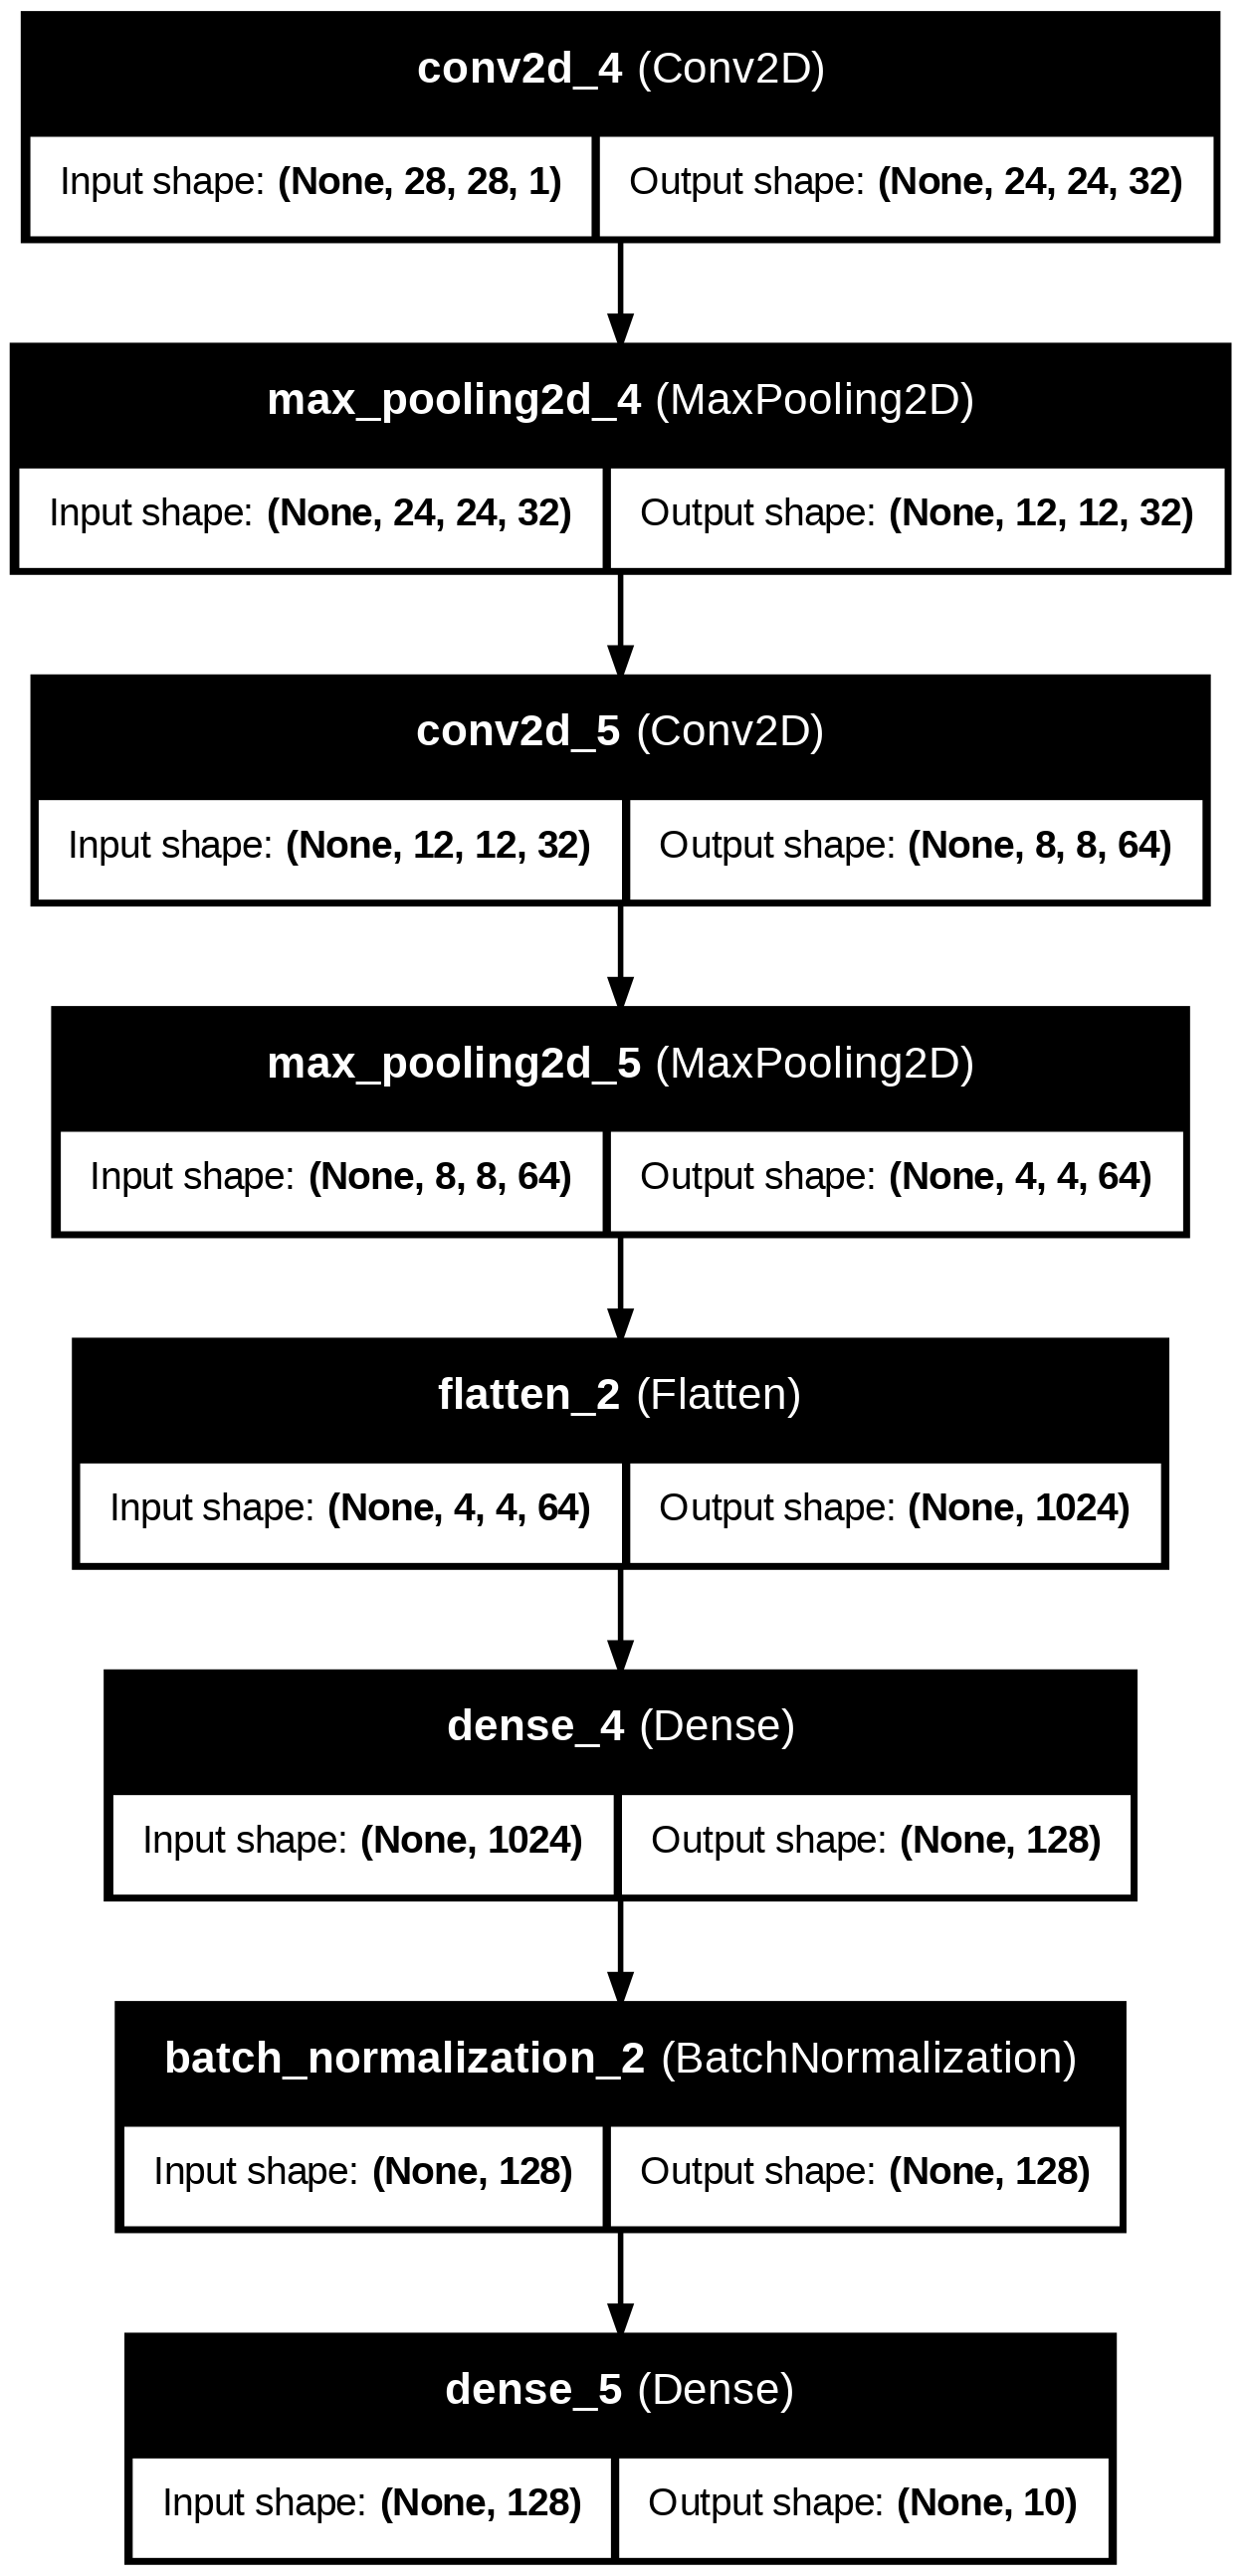

In [38]:
#Getting the model framework/summary
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

In [39]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,)

In [41]:
#Training the model
history = model.fit(X_train, Y_train,validation_data=(X_val, Y_val), batch_size=64,epochs=15)


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 90s 171ms/step - accuracy: 0.8787 - loss: 0.3930 - val_accuracy: 0.9113 - val_loss: 0.2988
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 169ms/step - accuracy: 0.9746 - loss: 0.0856 - val_accuracy: 0.9201 - val_loss: 0.2570
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 87s 166ms/step - accuracy: 0.9829 - loss: 0.0526 - val_accuracy: 0.9820 - val_loss: 0.0556
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 144s 171ms/step - accuracy: 0.9861 - loss: 0.0385 - val_accuracy: 0.9821 - val_loss: 0.0565
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 161ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9771 - val_loss: 0.0788
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 149s 174ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.9800 - val_loss: 0.0659
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 164ms/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.9748 - val_loss: 0.1098
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 143s 166ms/step - accuracy: 0.9927 - l

# Evaluating Results

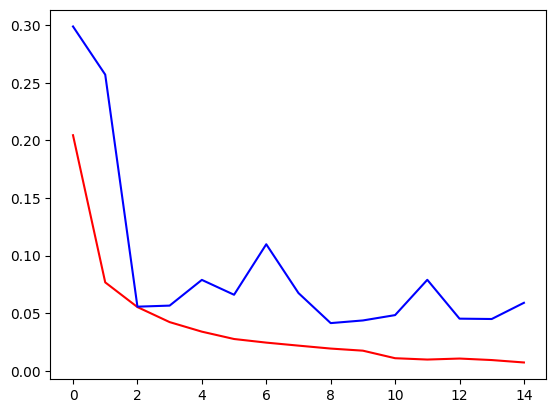

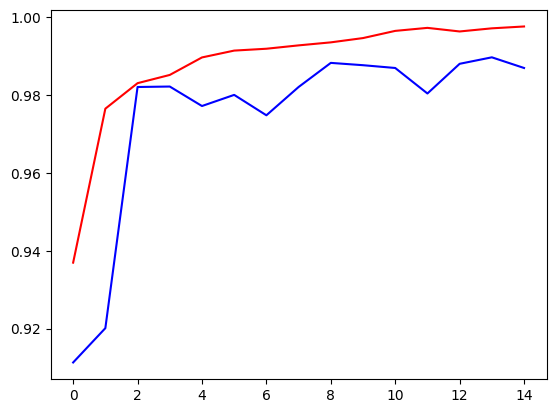

In [42]:
#Comparing losses and accuraries
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [43]:
#Plotting Confusion Matrix
y_pred1 = model.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
[[ 817    0    0    0    0    0    1    0    1    0]
 [   1 1005    0    0    0    0    0    2    0    0]
 [   2    2  843    0    0    0    0    3    3    0]
 [   0    0    5  849    0   11    0    0    5    1]
 [   2    1    0    0  804    0    4    2    0    2]
 [   0    0    0    0    1  789    6    1    1    0]
 [   0    0    1    0    0    0  785    0    0    0]
 [   0    2    2    0    0    0    0  872    0    0]
 [   3    0    4    0    1    5    3    0  747    2]
 [   5    0    0    0   16    4    0    4    1  779]]


# Saving the Predictions

In [44]:
#Predicting and Saving it as a CSV file
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('/content/drive/My Drive/Data_analytics/RESULT5.csv', index=False)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


875/875 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step
